In [ ]:
import numpy as np
import matplotlib.pylab as plt
from tqdm import tqdm
from sklearn.cluster import KMeans
from skimage.io import imread
from skimage import img_as_float
from PIL import Image

In [2]:
image = imread('parrots.jpg')

In [3]:
array = img_as_float(image)

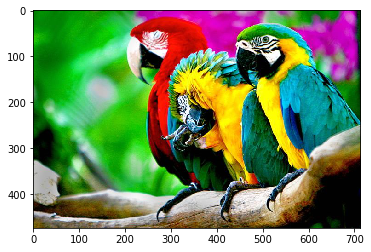

In [4]:
plt.imshow(array)
plt.show()

In [5]:
X = array.reshape(1, 474*713, 3)[0]

In [6]:
clasterizer = KMeans(random_state=241, n_clusters=20)
clasterizer.fit(X)

KeyboardInterrupt: 

In [ ]:
Y = clasterizer.predict(X)

In [7]:
def color_mean(X, Y, label):
    Xidx = list()
    for i, cl in enumerate(Y):
        if cl==label:
            Xidx.append(X[i])
    return np.mean(Xidx, axis=0)

def color_median(X, Y, label):
    Xidx = list()
    for i, cl in enumerate(Y):
        if cl==label:
            Xidx.append(X[i])
    return np.median(Xidx, axis=0)

def class2color_median(X, Y):
    labels = list(set(Y))
    colors = dict()
    newY = [0 for i in range(len(Y))]
    for label in labels:
         colors[label] = color_median(X, Y, label)
    for i in range(len(Y)):
        newY[i] = colors[Y[i]]
    return np.array(newY)

def class2color_mean(X, Y):
    labels = list(set(Y))
    colors = dict()
    newY = [0 for i in range(len(Y))]
    for label in labels:
         colors[label] = color_mean(X, Y, label)
    for i in range(len(Y)):
        newY[i] = colors[Y[i]]
    return np.array(newY)

In [ ]:
# Median val
newY = class2color_median(X, Y)
newY = newY.reshape(474, 713, 3)
plt.imshow(newY)
plt.show()

In [ ]:
# Mean val
newY = class2color_mean(X, Y)
newY = newY.reshape(474, 713, 3)
plt.imshow(newY)
plt.show()

In [8]:
def PCNR(image_true, image_pred):
    err = list([0,0,0])
    for i in xrange(len(image_true)):
        for j in xrange(len(image_true[0])):
            for k in range(len(err)):
                err[k] += (image_true[i][j][k] - image_pred[i][j][k])**2
    mseR = err[0] / (len(image_true)*len(image_true[0]))
    mseG = err[1] / (len(image_true)*len(image_true[0]))
    mseB = err[2] / (len(image_true)*len(image_true[0]))
    mse = (mseR + mseG + mseB) / 3.0
    MAX = 1.0
    return 10 * np.log10( MAX**2 / mse)

In [9]:
def fitnmark(X, num, image_true):
    clasterizer = KMeans(random_state=241, n_clusters=num)
    clasterizer.fit(X)
    Y = clasterizer.predict(X)
    newY = class2color_mean(X, Y)
    newY = newY.reshape(474, 713, 3)
    mark = PCNR(image_true, newY)
    print "PCNR = {0}".format(mark)
    print "{0} clusters".format(num)
    plt.imshow(newY)
    plt.show()
    return mark

In [10]:
nums = list([i for i in range(1, 20)])

  0%|          | 0/19 [00:00<?, ?it/s]

PCNR = 9.81883554477
1 clusters


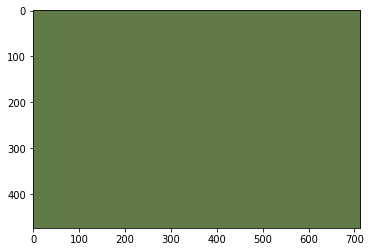

  5%|▌         | 1/19 [00:04<01:27,  4.88s/it]

PCNR = 12.0801770849
2 clusters


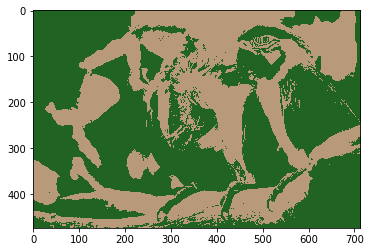

 11%|█         | 2/19 [00:11<01:33,  5.50s/it]

PCNR = 13.1534870446
3 clusters


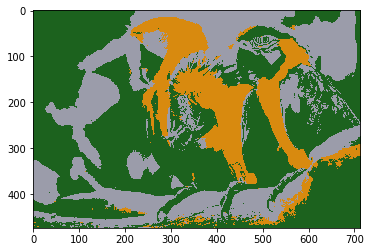

 16%|█▌        | 3/19 [00:19<01:36,  6.03s/it]

PCNR = 14.3678179409
4 clusters


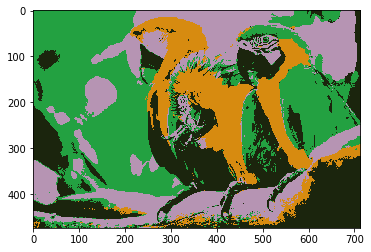

 21%|██        | 4/19 [00:27<01:43,  6.88s/it]

PCNR = 15.5271461973
5 clusters


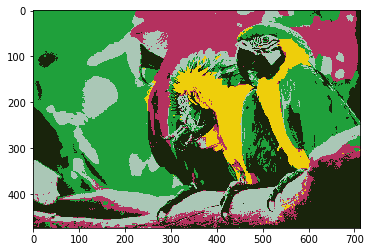

 26%|██▋       | 5/19 [00:38<01:50,  7.91s/it]

PCNR = 16.5439940966
6 clusters


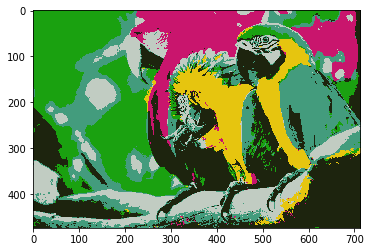

 32%|███▏      | 6/19 [00:50<02:00,  9.25s/it]

PCNR = 17.6409925086
7 clusters


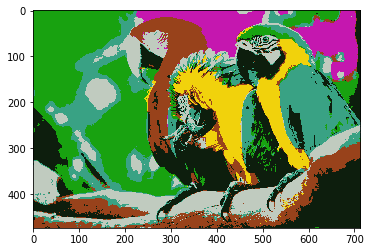

 37%|███▋      | 7/19 [01:02<01:59,  9.92s/it]

PCNR = 18.4368290141
8 clusters


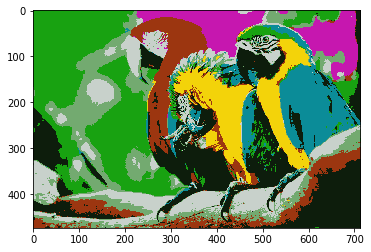

 42%|████▏     | 8/19 [01:16<02:02, 11.18s/it]

PCNR = 19.1126727358
9 clusters


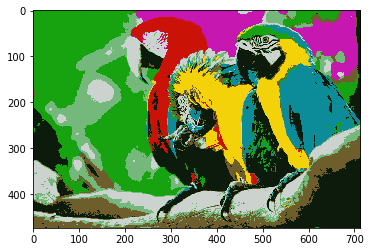

 47%|████▋     | 9/19 [01:35<02:16, 13.63s/it]

PCNR = 19.6407566359
10 clusters


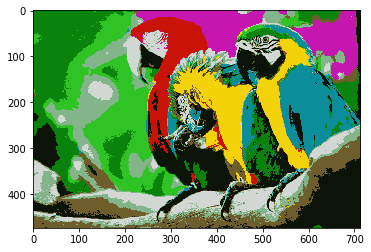

 53%|█████▎    | 10/19 [01:57<02:24, 16.09s/it]

PCNR = 20.1275887465
11 clusters


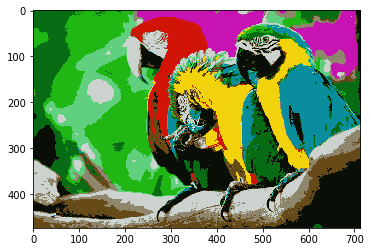

 58%|█████▊    | 11/19 [02:22<02:29, 18.66s/it]

PCNR = 20.5925163195
12 clusters


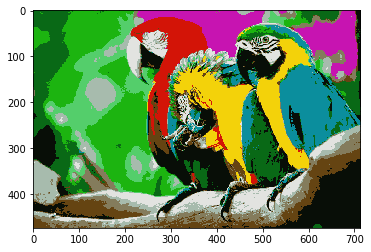

 63%|██████▎   | 12/19 [02:55<02:40, 22.98s/it]

PCNR = 21.0213796796
13 clusters


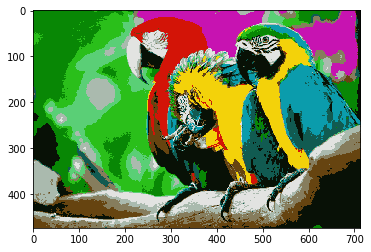

 68%|██████▊   | 13/19 [03:35<02:48, 28.12s/it]

PCNR = 21.2968465619
14 clusters


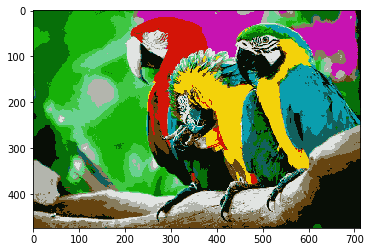

 74%|███████▎  | 14/19 [04:22<02:48, 33.72s/it]

PCNR = 21.6071717191
15 clusters


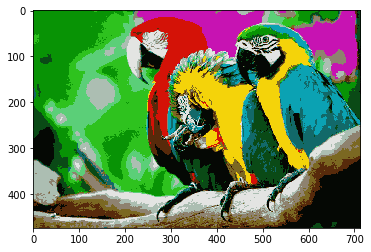

 79%|███████▉  | 15/19 [05:07<02:29, 37.30s/it]

PCNR = 21.863109813
16 clusters


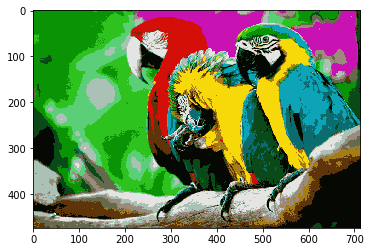

 84%|████████▍ | 16/19 [06:06<02:11, 43.75s/it]

PCNR = 22.1198059928
17 clusters


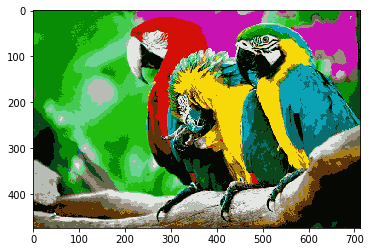

 89%|████████▉ | 17/19 [07:03<01:35, 47.74s/it]

PCNR = 22.3354987405
18 clusters


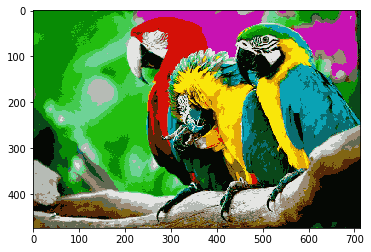

 95%|█████████▍| 18/19 [08:07<00:52, 52.52s/it]

PCNR = 22.5220978232
19 clusters


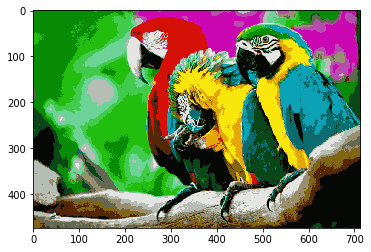

100%|██████████| 19/19 [09:22<00:00, 59.46s/it]


In [11]:
marks = list()
for i in tqdm(nums):
    marks.append(fitnmark(X, i, array))

In [12]:
with open('1.txt', mode='w') as _file:
    _file.write(str(11))